 # <font color='orange'>Aprendizaje no Supervisado (Parte IV)</font>

Como Cientista de Datos te han contratado en una importante empresa de propiedades para
analizar las diferentes características de algunas casas que se han vendido en el último
tiempo, y que se encuentran en el dataset house_data.xlsx. Esta base de datos contiene
diversas características de estas propiedades y su precio. Específicamente, se te solicita:

### 1. Analizar la calidad de datos, para lo que debes cargarlos y realizar un proceso exhaustivo de limpieza para eliminar valores faltantes, duplicados y atípicos que puedan afectar la calidad del modelo, si los hay.

In [4]:
# Paso 1: 

import pandas as pd

# Cargar el archivo
df = pd.read_excel("house_data.xlsx")

# Ver las primeras filas
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
#Paso 2:

# Información general

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Todos los campos tienen 21,613 valores no nulos, así que NO hay valores nulos

date es el único campo object, hay que  convertirlo a tipo datetime para usarlo después.

Los demás campos son int64 o float64, lo cual es perfecto para modelar y hacer transformaciones.



In [9]:
# Paso 3: Verificar si hay duplicados

# Cantidad de duplicados

print("Duplicados:", df.duplicated().sum())

Duplicados: 0


In [15]:
# Paso 4: Detectar outliers

# Filtrar solo columnas numéricas

df_num = df.select_dtypes(include=['int64', 'float64'])

# Calcular IQR solo para columnas numéricas

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

# Detección de outliers por IQR

outliers = (df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))

# Ver cuántos outliers hay por columna

print("Outliers detectados por columna:\n", outliers.sum())

Outliers detectados por columna:
 id                  0
price            1146
bedrooms          546
bathrooms         571
sqft_living       572
sqft_lot         2425
floors              0
waterfront        163
view             2124
condition          30
grade            1911
sqft_above        611
sqft_basement     496
yr_built            0
yr_renovated      914
zipcode             0
lat                 2
long              256
sqft_living15     544
sqft_lot15       2194
dtype: int64


| Columna                                | Outliers detectados | Análisis                                                                                                           |
| -------------------------------------- | ------------------- | ------------------------------------------------------------------------------------------------------------------ |
| `price`                                | 1146                | Alto número, lo cual **tiene sentido**, ya que hay casas muy caras.                                                |
| `sqft_lot`, `sqft_lot15`               | 2425 y 2194         | Son **los más extremos**, indica que hay casas con terrenos inusualmente grandes  |
| `grade`                                | 1911                | Puede indicar propiedades con **acabados muy lujosos o muy básicos**.                                              |
| `yr_renovated`                         | 914                 | No es preocupante. Renovaciones suelen estar concentradas en pocos años recientes.                                 |
| `view`                                 | 2124                | Muchas propiedades tienen una **vista privilegiada**, lo cual es esperable en zonas costeras o montañosas.         |
| `sqft_living`, `bathrooms`, `bedrooms` | 500–600             | Variación natural por tamaño de casas.                                                                 |
| `lat`, `long`                          | 2 y 256             | Los outliers aquí podrían ser **errores de geolocalización**.            |


In [20]:
# Paso 5: 

# Convertir la columna 'date' a datetime

df['date'] = pd.to_datetime(df['date'])

# Revisar el nuevo tipo de dato

print(df['date'].dtypes)

datetime64[ns]


### 2. Realizar un análisis descriptivo de las variables para entender la distribución de los datos y detectar posibles relaciones entre las características y los precios. En esto debes incluir un análisis de correlaciones entre las variables principalmente con el precio de las casas, comenta acerca de las variables con mayor correlación, ¿tienen sentido?

In [25]:
# Paso 1:  

# Desactivar notación científica
pd.set_option('display.float_format', '{:,.2f}'.format)

# Estadísticas de resumen para todas las columnas numéricas
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,"21,613.00",21613,"21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00",...,"21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00"
mean,"4,580,301,520.86",2014-10-29 04:38:01.959931648,"540,088.14",3.37,2.11,"2,079.90","15,106.97",1.49,0.01,0.23,...,7.66,"1,788.39",291.51,"1,971.01",84.40,"98,077.94",47.56,-122.21,"1,986.55","12,768.46"
min,"1,000,102.00",2014-05-02 00:00:00,"75,000.00",0.00,0.00,290.00,520.00,1.00,0.00,0.00,...,1.00,290.00,0.00,"1,900.00",0.00,"98,001.00",47.16,-122.52,399.00,651.00
25%,"2,123,049,194.00",2014-07-22 00:00:00,"321,950.00",3.00,1.75,"1,427.00","5,040.00",1.00,0.00,0.00,...,7.00,"1,190.00",0.00,"1,951.00",0.00,"98,033.00",47.47,-122.33,"1,490.00","5,100.00"
50%,"3,904,930,410.00",2014-10-16 00:00:00,"450,000.00",3.00,2.25,"1,910.00","7,618.00",1.50,0.00,0.00,...,7.00,"1,560.00",0.00,"1,975.00",0.00,"98,065.00",47.57,-122.23,"1,840.00","7,620.00"
75%,"7,308,900,445.00",2015-02-17 00:00:00,"645,000.00",4.00,2.50,"2,550.00","10,688.00",2.00,0.00,0.00,...,8.00,"2,210.00",560.00,"1,997.00",0.00,"98,118.00",47.68,-122.12,"2,360.00","10,083.00"
max,"9,900,000,190.00",2015-05-27 00:00:00,"7,700,000.00",33.00,8.00,"13,540.00","1,651,359.00",3.50,1.00,4.00,...,13.00,"9,410.00","4,820.00","2,015.00","2,015.00","98,199.00",47.78,-121.31,"6,210.00","871,200.00"
std,"2,876,565,571.31",NaN,"367,127.20",0.93,0.77,918.44,"41,420.51",0.54,0.09,0.77,...,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,"27,304.18"


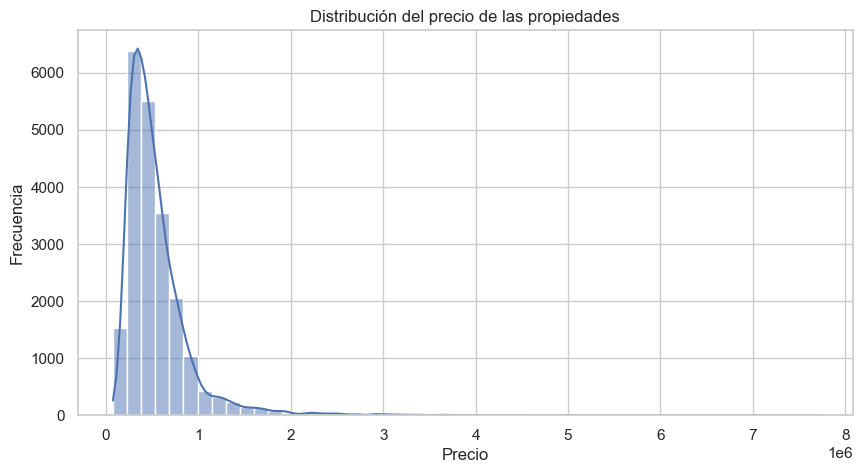

In [33]:
# Paso 2: Visualizaciones

import seaborn as sns
import matplotlib.pyplot as plt

# Estilo general
sns.set(style="whitegrid")

# 1. Histograma del precio
plt.figure(figsize=(10,5))
sns.histplot(df['price'], kde=True, bins=50)
plt.title("Distribución del precio de las propiedades")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()




**Análisis**

La variable price muestra una distribución claramente sesgada a la derecha, con la mayoría de las propiedades concentradas entre 300.000 y 600.000 USD. Existen valores extremos hacia precios elevados (hasta 7 millones), lo que indica la presencia de propiedades de lujo o características especiales. Esta distribución no es normal, por lo que puede afectar el rendimiento de modelos sensibles a outliers.

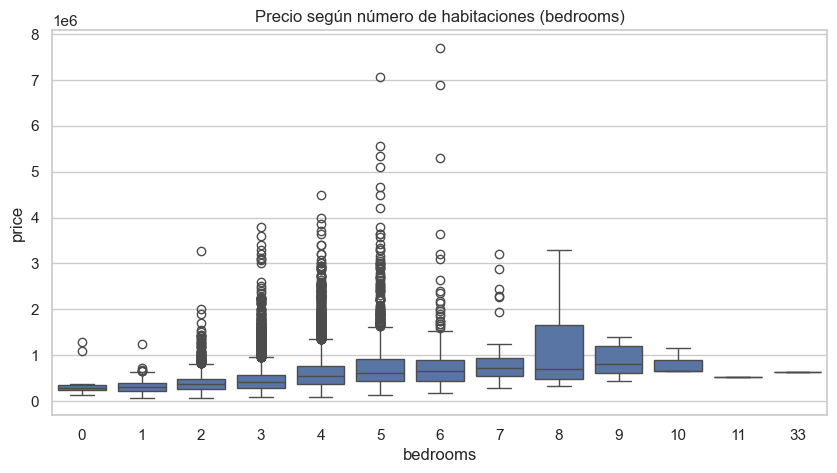

In [36]:
# 2. Boxplot: Precio vs. Bedrooms

plt.figure(figsize=(10,5))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title("Precio según número de habitaciones (bedrooms)")
plt.show()

**Análisis**

El número de dormitorios tiene una relación moderadamente positiva con el precio de las propiedades. Sin embargo, la presencia de numerosos valores atípicos sugiere que esta variable por sí sola no es un predictor fuerte del precio. Es necesario considerar otras características como tamaño (sqft_living), calidad (grade), ubicación (zipcode) y vista (view) para explicar adecuadamente las variaciones en el precio.

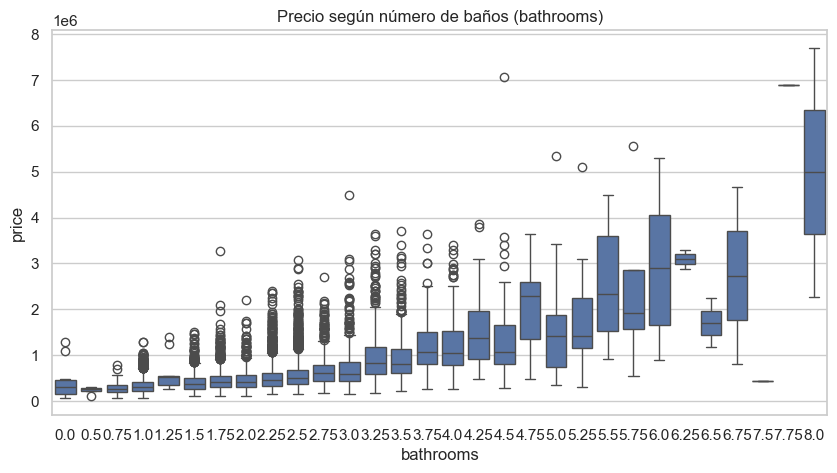

In [39]:
# 3. Boxplot: Precio vs. Bathrooms

plt.figure(figsize=(10,5))
sns.boxplot(x='bathrooms', y='price', data=df)
plt.title("Precio según número de baños (bathrooms)")
plt.show()


**Análisis**

El número de baños muestra una relación positiva fuerte con el precio de las propiedades. A diferencia de los dormitorios, la cantidad de baños refleja mejor el nivel de lujo y comodidad de la vivienda, lo cual tiene un impacto directo en su valoración. A medida que se incrementan los baños, tanto la mediana como el rango de precios tienden a subir de forma clara. Este patrón sugiere que la variable bathrooms será relevante para los modelos predictivos.



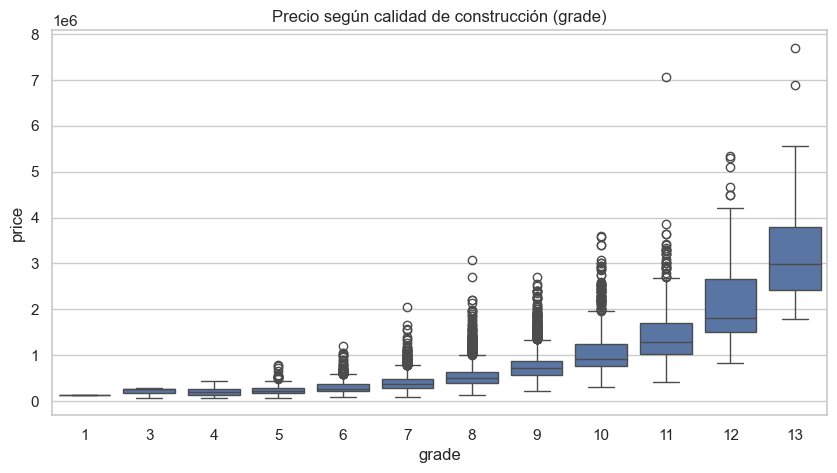

In [42]:
# 4. Boxplot: Precio vs. Grade

plt.figure(figsize=(10,5))
sns.boxplot(x='grade', y='price', data=df)
plt.title("Precio según calidad de construcción (grade)")
plt.show()

**Análisis**

La variable grade, que representa la calidad del diseño y construcción de la propiedad, muestra una de las relaciones más sólidas y progresivas con el precio. A mayor grade, mayor es el valor de la vivienda, lo cual es coherente con la lógica del mercado. Esta variable será clave para los modelos predictivos, ya que resume de forma eficiente múltiples aspectos de valor percibido.

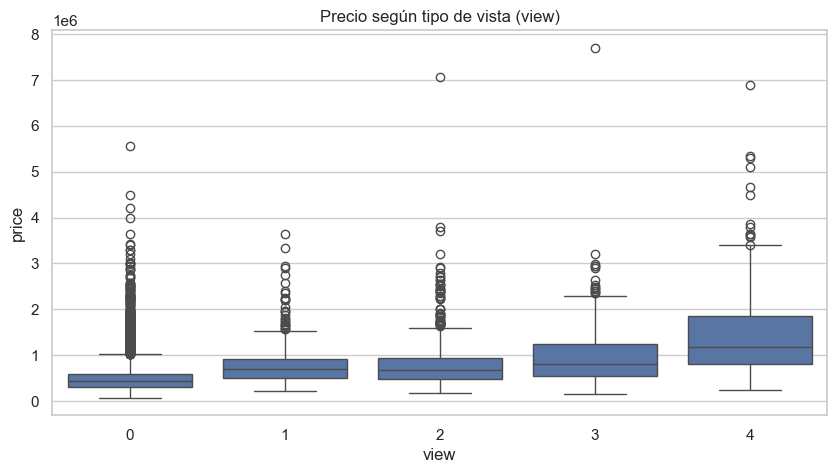

In [45]:
# 5. Boxplot: Precio vs. View

plt.figure(figsize=(10,5))
sns.boxplot(x='view', y='price', data=df)
plt.title("Precio según tipo de vista (view)")
plt.show()

**Análisis**

La variable view, que representa la calidad de la vista desde la propiedad, muestra una relación positiva con el precio. Las propiedades con mejores vistas (valores más altos en view) tienden a tener precios significativamente más altos, lo que es coherente con la percepción de valor del comprador. A pesar de que existen valores extremos en todos los niveles, esta variable será relevante para explicar variaciones en el precio de las casas.

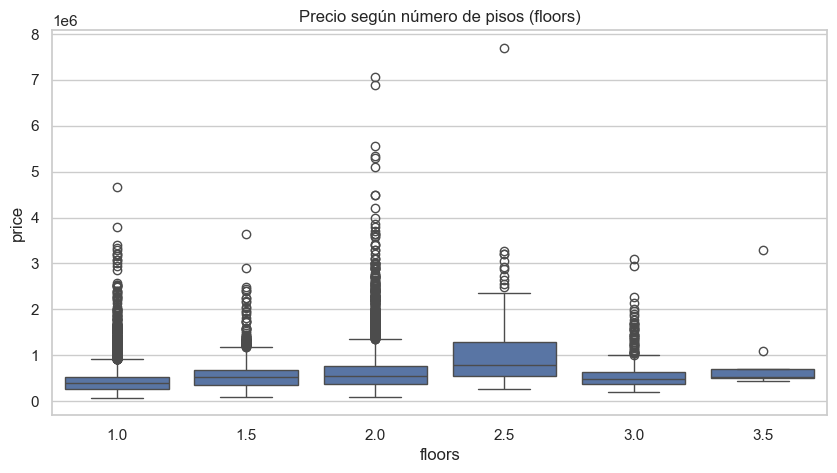

In [48]:
# 6. Boxplot: Precio vs. Floors

plt.figure(figsize=(10,5))
sns.boxplot(x='floors', y='price', data=df)
plt.title("Precio según número de pisos (floors)")
plt.show()

**Análisis**

La variable floors no muestra una relación clara ni consistente con el precio de las propiedades. A diferencia de otras variables como grade o bathrooms, el número de pisos parece tener un impacto marginal en el valor de una casa. Esto sugiere que floors no será una variable altamente predictiva por sí sola.

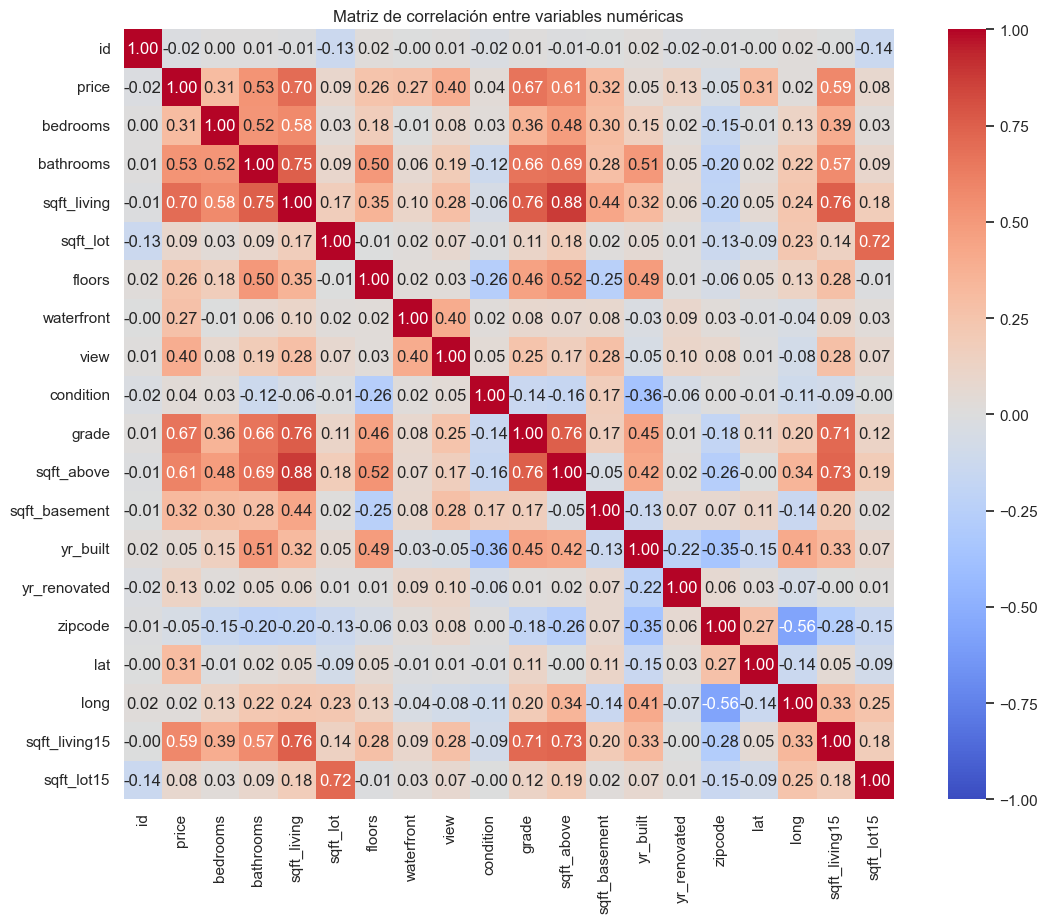

In [53]:
# Paso 3: Análisis de correlación con price

# 1. Matriz de correlación (solo variables numéricas)

corr_matrix = df.corr(numeric_only=True)

# 2. Visualizar matriz completa con heatmap

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap="coolwarm", 
            square=True,
            vmin=-1, vmax=1) 
plt.title("Matriz de correlación entre variables numéricas")
plt.show()



In [55]:
# 3. Correlaciones con 'price', ordenadas

cor_price = corr_matrix['price'].sort_values(ascending=False)
print("Correlaciones con el precio:\n")
print(cor_price)

Correlaciones con el precio:

price            1.00
sqft_living      0.70
grade            0.67
sqft_above       0.61
sqft_living15    0.59
bathrooms        0.53
view             0.40
sqft_basement    0.32
bedrooms         0.31
lat              0.31
waterfront       0.27
floors           0.26
yr_renovated     0.13
sqft_lot         0.09
sqft_lot15       0.08
yr_built         0.05
condition        0.04
long             0.02
id              -0.02
zipcode         -0.05
Name: price, dtype: float64


**Conclusión**

Evidencia que las variables que más influyen en el precio de las propiedades son: sqft_living, grade, sqft_above, sqft_living15 y bathrooms. Todas ellas están relacionadas con el tamaño, la calidad de construcción y las comodidades del inmueble. Por otro lado, variables como floors, yr_built o condition muestran baja o nula correlación con el precio, por lo que su aporte a un modelo predictivo sería limitado. Esta información será clave para seleccionar las variables más relevantes en la etapa de modelado.

#### 3. Divide los datos en conjuntos de entrenamiento y prueba de manera aleatoria o estratificada, dejando un 33% para test, luego de eso aplica alguna técnica de transformación de datos, como normalización o estandarización, para asegurar que las variables estén en una escala comparable. (hint: Recuerda que en la estandarización o normalización de los datos el fit.transform solo se aplica a los datos de train, mientras que a los datos de test se les aplica solo el transform).

In [65]:
# Paso 1: Seleccionar las variables predictoras (X) y la variable objetivo (y)

# Variables predictoras seleccionadas

features = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']

# X = características predictoras / y = variable objetivo (precio)

X = df[features]
y = df['price']

# Paso 2:   Dividir el dataset en entrenamiento y prueba (67% train / 33% test)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

# Paso 3: Escalar las variables con StandardScaler

from sklearn.preprocessing import StandardScaler

# Inicializar el escalador

scaler = StandardScaler()

# Ajustar y transformar SOLO los datos de entrenamiento

X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba usando el mismo escalador

X_test_scaled = scaler.transform(X_test)


### 4. Implementar modelos de regresión lineal con regularización, como Ridge, Lasso y Elastic Net con ajuste de hiper parámetros, según tabla sugerida, debes construir además un modelo de árboles de regresión para capturar relaciones no lineales y complejas entre las variables predictoras y el precio de las casas, finalmente genera un cuadro comparativo con modelos y métricas.

In [69]:
# Paso 1: Modelos de regresión lineal con regularización: Ridge, Lasso y Elastic Net.

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV #hiperparametro

# 1. Definir los parámetros de búsqueda (Definidos en el desafio)

ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
elastic_params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

# 2. Inicializar los modelos base

ridge = Ridge()
lasso = Lasso(max_iter=10000)  # max_iter alto por si no converge rápido
elastic = ElasticNet(max_iter=10000)

# 3. Ajustar modelos con GridSearchCV

ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
elastic_grid = GridSearchCV(elastic, elastic_params, cv=5, scoring='neg_mean_squared_error')

# 4. Entrenar los modelos con los datos escalados

ridge_grid.fit(X_train_scaled, y_train)
lasso_grid.fit(X_train_scaled, y_train)
elastic_grid.fit(X_train_scaled, y_train)

# 5. Imprimir los mejores parámetros encontrados

print("Mejor alpha Ridge:", ridge_grid.best_params_)
print("Mejor alpha Lasso:", lasso_grid.best_params_)
print("Mejores parámetros ElasticNet:", elastic_grid.best_params_)


Mejor alpha Ridge: {'alpha': 10}
Mejor alpha Lasso: {'alpha': 0.001}
Mejores parámetros ElasticNet: {'alpha': 0.001, 'l1_ratio': 0.5}


**Ridge (alpha=10):** El modelo prefiere penalizar más fuertemente los coeficientes grandes - puede estar suavizando diferencias para mejorar la generalización.

**Lasso (alpha=0.001):** Penaliza casi nada → probablemente porque las variables que usamos ya están muy bien seleccionadas ( Lasso puede eliminar variables).

**ElasticNet (alpha=0.001, l1_ratio=0.5):** Mezcla L1 y L2, con penalización suave, tratando de mantener todas las variables.

In [72]:
# Paso 2: Evaluar y comparar los modelos usando metricas:
# MAE – Error Absoluto Medio
# MSE – Error Cuadrático Medio
# R² – Coeficiente de Determinación

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Crear un diccionario para guardar resultados

resultados = {}

# 1. Ridge

y_pred_ridge = ridge_grid.predict(X_test_scaled)
resultados['Ridge'] = {
    'MAE': mean_absolute_error(y_test, y_pred_ridge),
    'MSE': mean_squared_error(y_test, y_pred_ridge),
    'R2': r2_score(y_test, y_pred_ridge)
}

# 2. Lasso

y_pred_lasso = lasso_grid.predict(X_test_scaled)
resultados['Lasso'] = {
    'MAE': mean_absolute_error(y_test, y_pred_lasso),
    'MSE': mean_squared_error(y_test, y_pred_lasso),
    'R2': r2_score(y_test, y_pred_lasso)
}

# 3. ElasticNet

y_pred_elastic = elastic_grid.predict(X_test_scaled)
resultados['ElasticNet'] = {
    'MAE': mean_absolute_error(y_test, y_pred_elastic),
    'MSE': mean_squared_error(y_test, y_pred_elastic),
    'R2': r2_score(y_test, y_pred_elastic)
}

# Mostrar cuadro comparativo

pd.DataFrame(resultados).T


,MAE,MSE,R2
Ridge,"164,363.17","69,179,464,253.55",0.54
Lasso,"164,379.33","69,174,137,280.87",0.54
ElasticNet,"164,367.55","69,177,955,115.93",0.54


**Conclusión**

Los tres modelos de regresión regularizada (Ridge, Lasso y ElasticNet) obtuvieron un rendimiento similar, con un R² de 0.54, lo que indica que explican el 54% de la variabilidad en el precio de las propiedades. El error absoluto medio fue cercano a $164,000 USD. Estos resultados muestran que las variables seleccionadas tienen una buena capacidad predictiva, aunque existe margen de mejora incluyendo más variables o modelos no lineales. El modelo Ridge, con una regularización más fuerte, puede ser una buena opción por su estabilidad.

In [75]:
# Paso 3:  Entrenar el modelo de árbol de regresión 

from sklearn.tree import DecisionTreeRegressor

tree_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tree = DecisionTreeRegressor(random_state=42)

grid_tree = GridSearchCV(tree, tree_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_tree.fit(X_train_scaled, y_train)

best_tree = grid_tree.best_estimator_
print("Mejores parámetros Árbol de Regresión:", grid_tree.best_params_)


Mejores parámetros Árbol de Regresión: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


**max_depth = 10:** El árbol no se expande más allá de 10 niveles - controla el sobreajuste y mantiene la estructura interpretable.

**min_samples_split = 10:** Solo se divide un nodo si hay al menos 10 muestras - ayuda a evitar divisiones innecesarias que podrían causar ruido.

**min_samples_leaf = 4:** Cada hoja del árbol tiene al menos 4 observaciones - garantiza estabilidad en las predicciones finales.

In [89]:
# Paso 4: Evaluar este modelo usando las métricas sobre el conjunto de prueba (X_test, y_test)
# MAE – Error Absoluto Medio
# MSE – Error Cuadrático Medio
# R² – Coeficiente de Determinación

# Predicción con el mejor modelo de árbol

y_pred_tree = best_tree.predict(X_test_scaled)

resultados['Decision Tree'] = {
    'MAE': mean_absolute_error(y_test, y_pred_tree),
    'MSE': mean_squared_error(y_test, y_pred_tree),
    'R2': r2_score(y_test, y_pred_tree)
}

# Mostrar resultados como DataFrame ordenado
resultados_df = pd.DataFrame(resultados).T
display(resultados_df)



,MAE,MSE,R2
Ridge,"164,363.17","69,179,464,253.55",0.54
Lasso,"164,379.33","69,174,137,280.87",0.54
ElasticNet,"164,367.55","69,177,955,115.93",0.54
Decision Tree,"161,028.40","70,240,572,277.15",0.53


**Análisis**

Aunque mejora ligeramente el MAE, no supera significativamente en R² a los modelos lineales. Su mayor MSE sugiere menos robustez ante valores extremos, algo esperable en árboles si no hay suficiente profundidad o poda.

**Comparación clave**

Todos los modelos explican aproximadamente el 53-54% de la variabilidad del precio.

El árbol mejora un poco el MAE pero no mejora el R², y su MSE es peor, probablemente por su sensibilidad a outliers.

ElasticNet, Ridge y Lasso son más estables y menos propensos al overfitting con pocas variables.


Para un modelo simple, interpretable y estable, ElasticNet o Ridge son buenas opciones.
Si se quiere explorar más relaciones no lineales o construir un modelo más complejo, se puede optimizar el árbol o probar modelos más avanzados como Random Forest o Gradient Boosting.

#### 5. Elige uno de los modelos de regresión lineal con regularización implementados en el punto anterior y gráfica cómo varían sus hiperparámetros durante el ajuste, mostrando también cómo afectan el rendimiento del modelo.

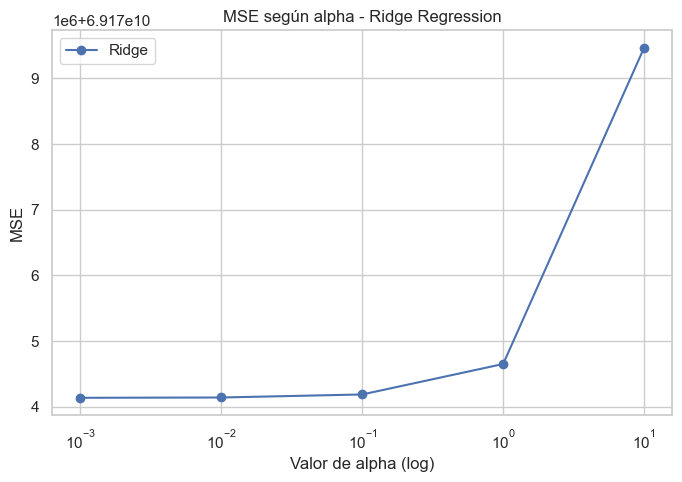

In [93]:
# Paso 1: Gráfica para Ridge Regression

from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

alphas = [0.001, 0.01, 0.1, 1, 10] # Valores de alpha que vamos a probar
mse_ridge = [] # Lista para guardar los MSE de cada alpha

for alpha in alphas:
    model = Ridge(alpha=alpha) # 1. Crear modelo Ridge con ese alpha
    model.fit(X_train_scaled, y_train)  # 2. Entrenar el modelo con los datos de entrenamiento
    y_pred = model.predict(X_test_scaled) # 3. Predecir sobre los datos de prueba
    mse_ridge.append(mean_squared_error(y_test, y_pred)) # 4. Calcular y guardar el MSE

plt.figure(figsize=(8,5))
plt.plot(alphas, mse_ridge, marker='o', label='Ridge')
plt.xscale('log')
plt.xlabel('Valor de alpha (log)')
plt.ylabel('MSE')
plt.title('MSE según alpha - Ridge Regression')
plt.grid(True)
plt.legend()
plt.show()


**Conclusión**

Aunque el gráfico muestra que valores pequeños de alpha parecen tener menor MSE en una única corrida, el resultado de GridSearchCV te da un valor óptimo más confiable (alpha = 10) ya que está basado en múltiples particiones de los datos (cross-validation).
Esto indica que con alpha = 10 el modelo Ridge generaliza mejor en promedio.

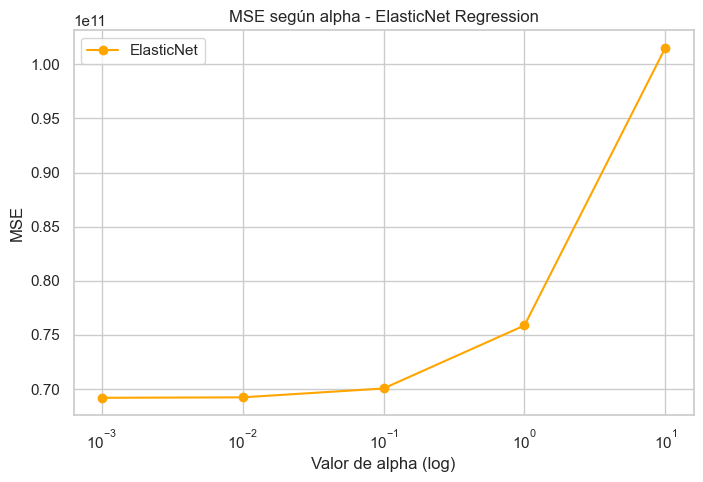

In [96]:
# Paso 2: Gráfica para ElasticNet Regression

from sklearn.linear_model import ElasticNet

alphas = [0.001, 0.01, 0.1, 1, 10]
mse_elastic = []

for alpha in alphas:
    model = ElasticNet(alpha=alpha, l1_ratio=0.5, max_iter=10000)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse_elastic.append(mean_squared_error(y_test, y_pred))

plt.figure(figsize=(8,5))
plt.plot(alphas, mse_elastic, marker='o', color='orange', label='ElasticNet')
plt.xscale('log')
plt.xlabel('Valor de alpha (log)')
plt.ylabel('MSE')
plt.title('MSE según alpha - ElasticNet Regression')
plt.grid(True)
plt.legend()
plt.show()


**Conclusión**

El gráfico indica que valores pequeños de alpha (como 0.001 o 0.01) permiten que el modelo ElasticNet tenga menores errores de predicción (MSE).
A medida que alpha aumenta, el modelo se vuelve más restrictivo y la calidad de las predicciones empeora.
Por eso, valores altos de alpha no son recomendables para este conjunto de datos. En la  búsqueda de hiperparámetros con GridSearchCV para ElasticNet arrojó alpha= 0.001 como el que da el mejor rendimiento, validando los resultados anteriores.

**Conclusión Final del Análisis de Modelos de Regresión**


En este proyecto, se implementaron y compararon distintos modelos de regresión para predecir el precio de viviendas, utilizando como variables predictoras aquellas con mayor correlación con el precio: sqft_living, grade, sqft_above, sqft_living15 y bathrooms.

Modelos implementados:

1-. Regresión Ridge

2-. Regresión Lasso

3-. Regresión ElasticNet

4-. Árbol de Decisión (para capturar relaciones no lineales)


| Modelo         | MAE        | MSE               | R²   |
| -------------- | ---------- | ----------------- | ---- |
| Ridge          | 164,363.17 | 69,179,464,253.55 | 0.54 |
| Lasso          | 164,379.33 | 69,174,137,280.87 | 0.54 |
| ElasticNet     | 164,367.55 | 69,177,955,115.93 | 0.54 |
| Árbol Decisión | 161,028.40 | 70,240,572,277.15 | 0.53 |

Todos los modelos lineales con regularización (Ridge, Lasso, ElasticNet) ofrecieron rendimientos muy similares, con un R² de 0.54.

El Árbol de Decisión tuvo un desempeño levemente inferior (R² de 0.53), pero con un MAE más bajo, lo que sugiere que comete errores menos graves en promedio, aunque menos consistente globalmente.

En general, los modelos no logran explicar más del 54% de la varianza del precio, lo que sugiere que existen factores adicionales importantes no considerados (ubicación precisa, vista al mar, detalles de renovación, entre otros).

Los valores de alpha óptimos se encontraron en los rangos más bajos (0.001 a 0.01), lo cual se confirmó tanto por GridSearchCV como por el análisis gráfico.

Un alpha muy alto genera sobre-regularización, aumentando el error.

ElasticNet ofrece flexibilidad combinando L1 y L2, pero en este caso no superó significativamente a los demás.

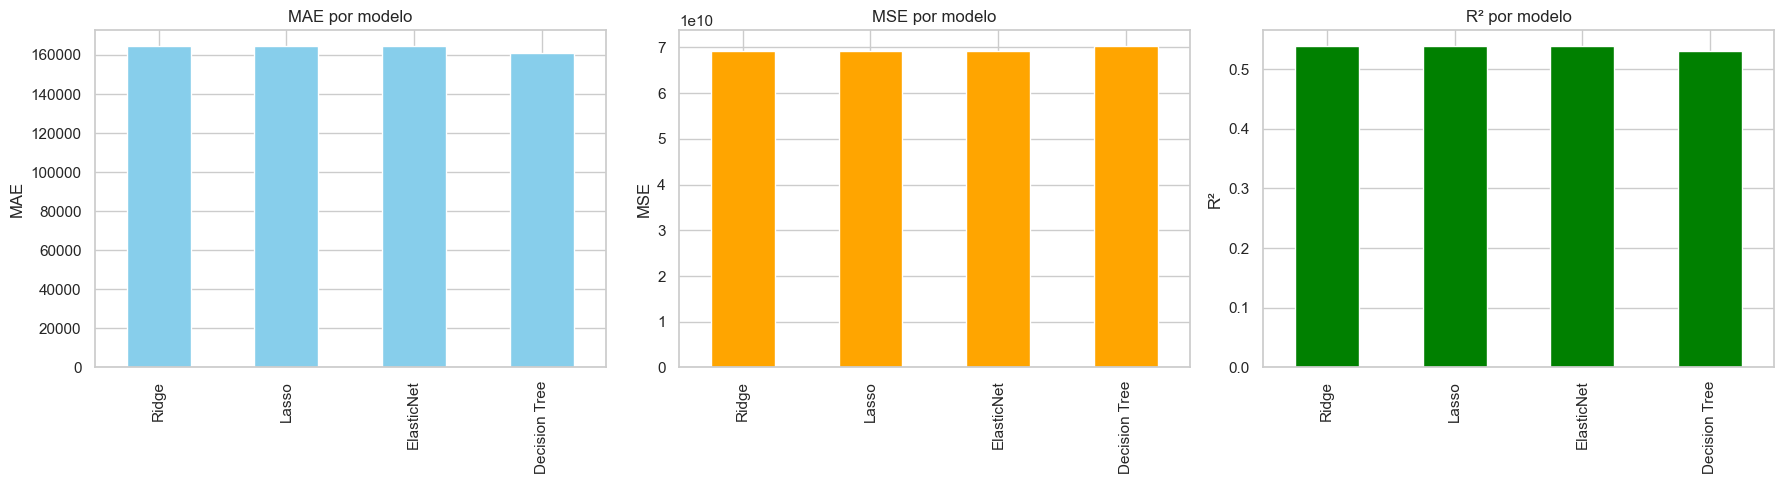

In [103]:
# Crear gráfico de barras para cada métrica
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# MAE
resultados_df['MAE'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('MAE por modelo')
axes[0].set_ylabel('MAE')

# MSE
resultados_df['MSE'].plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('MSE por modelo')
axes[1].set_ylabel('MSE')

# R²
resultados_df['R2'].plot(kind='bar', ax=axes[2], color='green')
axes[2].set_title('R² por modelo')
axes[2].set_ylabel('R²')

plt.tight_layout()
plt.show()

Tras entrenar y evaluar cuatro modelos distintos para predecir el precio de las casas (Ridge, Lasso, ElasticNet y Árbol de Decisión), se observa que:

Los tres modelos de regresión lineal con regularización (Ridge, Lasso y ElasticNet) presentan métricas de rendimiento casi idénticas.

MAE ≈ 164,000

MSE ≈ 69 mil millones

R² ≈ 0.54

El Árbol de Decisión, a pesar de su capacidad para modelar relaciones no lineales, no logró una mejora significativa. De hecho:

Tiene un MAE levemente menor (~161,000), lo que indica un menor error promedio.

Pero su MSE es más alto, lo que sugiere que comete algunos errores grandes.

Además, su R² es un poco inferior (≈ 0.53), indicando que explica ligeramente menos variabilidad del precio.

